<a href="https://colab.research.google.com/github/LCCuong/LCCuong/blob/gh-pages/Three_layers_NeuralNetwork_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [421]:
import numpy as np
import matplotlib as plt
np.random.seed()

# **Tạo các activation functions**

In [422]:

def sigmoid(s):
  return 1/(1+np.exp(-s))

def d_sigmoid(s):
  return sigmoid(s)*(1 - sigmoid(s))

print("sigmoid(s) =", sigmoid(np.asarray([3, 7, 8])))
print("d_sigmoid(s) = ", d_sigmoid(np.asarray([3, 7, 8])))

#print(np.asarray([[1, 2], [3, 4], [5, 6]]).T + np.asarray([1, 2, 3]))
#print(np.log(np.asarray([1, 2, 3])))
l = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
print(l[5:])
a = [i for i in range(5,3,-1)]
print(a)

sigmoid(s) = [0.95257413 0.99908895 0.99966465]
d_sigmoid(s) =  [0.04517666 0.00091022 0.00033524]
[6, 7, 8, 9, 10]
[5, 4]


In [423]:
def tanh(x):
  return (np.exp(x-np.max(x, axis = 1, keepdims = True)) - np.exp(-x-np.max(x, axis = 1, keepdims = True)))/(np.exp(x-np.max(x, axis = 1, keepdims = True)) + np.exp(-x-np.max(x, axis = 1, keepdims = True)))

# tanh derivative
def d_tanh(x):
  return 1 - tanh(x) * tanh(x)

In [424]:
def relu(s):
  m = 0 + s
  m[m < 0] = 0
  return m

def d_relu(s):
  m = s + 0
  m[m > 0] = 1
  return m
  
print(relu(np.asarray([3,5,-1])))
print(d_relu(np.asarray([3,5,-1])))

[3 5 0]
[ 1  1 -1]


In [425]:
def softmax(s):
  e_s = np.exp(s - np.max(s, axis = 1, keepdims = True))
  result = e_s / e_s.sum(axis = 1, keepdims = True)
  return result

#print(softmax(np.asarray([3,5,-1])))

In [426]:
def cross_entropy_loss(Ypred, Y): 
  loss = np.asarray([np.sum(np.multiply(Y[i], np.log(Ypred[i] + 1e-9))) for i in range(Y.shape[0])])
  return -np.mean(loss)

In [427]:
class layer:
  def __init__(self, input_size, output_size, activation = "none"):
    self.input_size = input_size
    self.output_size = output_size
    if activation!="none":
      if activation == "relu":
        self.activation = relu
        self.derivative = d_relu
      elif activation == "softmax":
        self.activation = softmax
        self.derivative = 0
      elif activation == "sigmoid":
        self.activation = sigmoid
        self.derivative = d_sigmoid
      elif activation == "tanh":
        self.activation = tanh
        self.derivative = d_tanh
      else:
        raise ValueError('Activation not found')
      np.random.seed()
      #self.W = np.random.randn(self.input_size, self.output_size)/np.sqrt(self.input_size*self.output_size) 
      self.W = np.random.randn(self.input_size, self.output_size)/np.sqrt(self.input_size)
      self.b = 1.0*np.zeros((self.output_size), dtype = np.uint8) 
    else:
      self.activation = "none"
      if (input_size!=output_size):
        raise ValueError('Input layer must have the same input_size and output_size')
    #print(self.W.type)
  def __call__(self, input):
    if self.activation != "none":
      self.z = np.dot(input, self.W) + self.b
     # self.z = self.z/np.sum()
      #self.z = self.W.T.dot(input) + self.b
      self.a = self.activation(self.z)
      return self.a
    else:
      self.a = self.z = input
      return input

In [428]:
import math
import random
print(math.ceil(2.8))

3


# **3_layers_Network**

In [429]:
class Neural_network:
  def __init__(self, *args):
    self.Number_Of_Layers = len(args)
    self.L = []
    #if len(args)!=3:
     # raise ValueError(f'Number of layers must be 3')
    for arg in args:
      if len(self.L)!=0:
        if arg.input_size != self.L[len(self.L)-1].output_size:
          raise ValueError(f'input_size of layer {len(self.L)} must equal to output_size of layer {len(self.L)-1}')
      self.L.append(arg)
##########################################################################################################################
  def FeedForward(self, input):
    x = input
    #print(x.shape)
    for Layer in self.L:
      x = Layer(x)
    return x
##########################################################################################################################
  def Backpropagation(self, X, Y):
    with np.errstate(divide="warn"):
  #    print(self.L[self.Number_Of_Layers - 1].W)
      E = (self.L[self.Number_Of_Layers - 1].a - Y)/(self.L[self.Number_Of_Layers - 1].a.shape[0])
    #print("hello:", self.L[self.Number_Of_Layers - 2].a.shape[0])
      delta_W = []
      d_W = np.dot(self.L[self.Number_Of_Layers - 2].a.T, E)
      delta_W.append(d_W)
      delta_b = []
      d_b = np.sum(E, axis = 0)
      delta_b.append(d_b)
      for i in range(self.Number_Of_Layers-2, 0, -1):
        E = np.multiply(np.dot(E, self.L[i+1].W.T), self.L[i].derivative(self.L[i].z))
        d_W = np.dot(self.L[i-1].a.T, E)
        delta_W.insert(0,d_W)
        d_b = np.sum(E, axis = 0)
        delta_b.insert(0, d_b)

    return delta_W, delta_b
##########################################################################################################################
  def lr_exp_decay(self, epoch, init_eta):
      k = 0.1
      return init_eta * math.exp(-k*epoch)
##########################################################################################################################
  def val(self, pred, truth):
    pred_result = np.asarray([pred[i].argmax() for i in range(len(pred))])
    truth_result = np.asarray([truth[i].argmax() for i in range(len(truth))])
    return np.mean(pred_result == truth_result)
#########################################################################################################################
  def predict(self, X):
    pred = self.FeedForward(X)
    return pred
##########################################################################################################################
  def fit(self, X, Y, testX, testY, epoches, eta, batch_size):
    numberOfBatch = math.ceil(X.shape[0]/batch_size)
    loss_array = []
    lenLoss = 0
    random.seed()
    self.val_array = []
    self.acc_array = []
    LR = eta
    for epoch in range(epoches):
      loss = 0
      #if (epoch+1)%10 == 0:
      #  LR = self.lr_exp_decay((epoch+1)/10, eta)
      LR = self.lr_exp_decay(epoch, eta)
      val_array = []
      acc_array = []
      for batch in range(numberOfBatch-1):
        TrainX = X[batch*batch_size : (batch+1)*batch_size - 1]
        TrainY = Y[batch*batch_size : (batch+1)*batch_size - 1]
        TestX = X[(numberOfBatch - 1)*batch_size : ]
        TestY = Y[(numberOfBatch - 1)*batch_size : ]
        test_result = self.predict(TestX)
        val_array.append(self.val(test_result, TestY))
        ypred = self.FeedForward(TrainX)
        acc_array.append(self.val(ypred, TrainY))
        loss = cross_entropy_loss(ypred, TrainY)
          #print(ypred[0][5], ypred[0].argmax())
        (dW, db) = self.Backpropagation(TrainX, TrainY)
        for i in range(1, self.Number_Of_Layers):
          self.L[i].W += -LR*dW[i-1]
          self.L[i].b += -LR*db[i-1]
      test = self.predict(testX)
      real_test_result = np.asarray([test[i].argmax() for i in range(len(test))])
      real_acc = np.mean(real_test_result == testY)
      val_acc = np.mean(np.asarray(val_array))
      acc = np.mean(np.asarray(acc_array))
      self.val_array.append(val_acc)
      self.acc_array.append(acc)
      print(f"epoch {epoch} - loss: {loss} - val_acc: {val_acc} - acc: {acc} - learning rate: {LR} - real_acc: {real_acc}")
      dist = abs(val_acc - acc)
      #if dist < 0.001 and epoch>=50:
       # return
##########################################################################################################################


In [430]:
from keras.datasets import mnist
(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [431]:
def to_one_hot(labels, dimension):
  result =np.zeros((len(labels), dimension), dtype = np.uint8)
  for i, label in enumerate(labels):
    result[i, label] = 1
  return np.asarray(result)
  

In [432]:
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))
train_X[train_X>0] = 1
test_X[test_X>0] = 1
train_size = train_X.shape[0]
test_size = test_X.shape[0]
#-----------------------------------------------------------------------
trainX = np.asarray([train_X[i].flatten() for i in range(train_size)])
testX = np.asarray([test_X[i].flatten() for i in range(test_size)])
#-----------------------------------------------------------------------
trainY = to_one_hot(train_y, 10)
testY = to_one_hot(test_y, 10)
print(trainY.shape)

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)
(60000, 10)


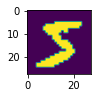

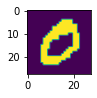

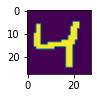

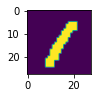

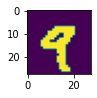

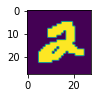

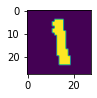

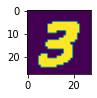

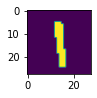

In [433]:
from matplotlib import pyplot
import matplotlib.pyplot as plt
for i in range(9):  
  pyplot.subplot(330 + 1 + i)
  pyplot.imshow(train_X[i])#, cmap=pyplot.get_cmap('gray'))
  pyplot.show()

In [406]:
model = Neural_network(
    layer(input_size = 28*28, output_size = 28*28),
    layer(input_size = 28*28, output_size = 2048, activation = "relu"),
    #layer(input_size = 512, output_size = 88, activation = "sigmoid"),
    layer(input_size = 2048, output_size = 90, activation  = "tanh"),
    layer(input_size = 90, output_size = 10, activation = "softmax")
)
Num_epoches = 25
model.fit(trainX, trainY, testX, test_y, epoches = Num_epoches, eta = 0.5, batch_size = 128)

epoch 0 - loss: 0.035085196886332395 - val_acc: 0.9248352920227921 - acc: 0.9003465912914731 - learning rate: 0.5 - real_acc: 0.9426
epoch 1 - loss: 0.013304191258327352 - val_acc: 0.9859330484330486 - acc: 0.9735513830002019 - learning rate: 0.45241870901797976 - real_acc: 0.9686
epoch 2 - loss: 0.018565746728293017 - val_acc: 0.987335292022792 - acc: 0.9853287569823003 - learning rate: 0.4093653765389909 - real_acc: 0.9718
epoch 3 - loss: 0.004711775490612962 - val_acc: 0.9875801282051282 - acc: 0.9916044148327613 - learning rate: 0.37040911034085894 - real_acc: 0.9757
epoch 4 - loss: 0.0037583018967239975 - val_acc: 0.987758190883191 - acc: 0.9953563496870584 - learning rate: 0.33516002301781966 - real_acc: 0.9781
epoch 5 - loss: 0.003515111978765865 - val_acc: 0.989383012820513 - acc: 0.9977959485833502 - learning rate: 0.3032653298563167 - real_acc: 0.9785
epoch 6 - loss: 0.002737904144104586 - val_acc: 0.9895833333333335 - acc: 0.9990409852614577 - learning rate: 0.27440581804701

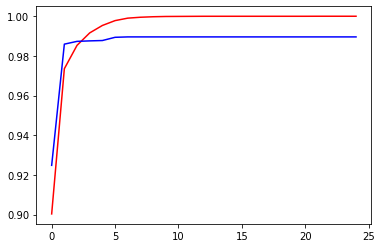

In [407]:
acc_list = model.acc_array
val_acc_list = model.val_array
plt.plot(range(Num_epoches), acc_list, color = "red", label = "Training accuracy")
plt.plot(range(Num_epoches), val_acc_list, color = "blue", label = "Training val_accuracy")

In [408]:
test = model.predict(testX)
print(test.shape)

(10000, 10)


In [409]:
test_result = np.asarray([test[i].argmax() for i in range(len(test))])

In [410]:
print(test_result)
print(test_y)

[7 2 1 ... 4 5 6]
[7 2 1 ... 4 5 6]


In [411]:
acc = np.mean(test_result == test_y)

In [412]:
print(acc)

0.9816


In [413]:
"""
import cv2
from google.colab.patches import cv2_imshow
"""

'\nimport cv2\nfrom google.colab.patches import cv2_imshow\n'

In [414]:
""""
image = cv2.imread("/content/7.2.png")
cv2_i
"""

'"\nimage = cv2.imread("/content/7.2.png")\ncv2_i\n'

In [415]:
#imageB2G = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [416]:
#imageB2G

In [417]:
#img = np.asarray(imageB2G)
#img[img>0] = 1

In [418]:
#imgArray = [img.flatten()]

In [419]:
#imgArray

In [420]:
""""
PRED = model.predict(imgArray)
print("Image: ")
cv2_imshow(image)
print("Prediction result: ", np.asarray(PRED).argmax())
"""

'"\nPRED = model.predict(imgArray)\nprint("Image: ")\ncv2_imshow(image)\nprint("Prediction result: ", np.asarray(PRED).argmax())\n'